In [71]:
!pip install pandas 
!pip install --upgrade pandas


In [72]:
import pandas as pd

# Carica il dataset da un file CSV
cyclists = pd.read_csv('dataset/dataset/cyclists.csv')
races = pd.read_csv('dataset/dataset/races.csv')
# Mostra le prime righe del dataset
cyclists.head()


,_url,name,birth_year,weight,height,nationality
0,bruno-surra,Bruno Surra,1964.0,NaN,NaN,Italy
1,gerard-rue,Gérard Rué,1965.0,74.0,182.0,France
2,jan-maas,Jan Maas,1996.0,69.0,189.0,Netherlands
3,nathan-van-hooydonck,Nathan Van Hooydonck,1995.0,78.0,192.0,Belgium
4,jose-felix-parra,José Félix Parra,1997.0,55.0,171.0,Spain


In [73]:
cyclists.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6134 entries, 0 to 6133
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _url         6134 non-null   object 
 1   name         6134 non-null   object 
 2   birth_year   6121 non-null   float64
 3   weight       3078 non-null   float64
 4   height       3143 non-null   float64
 5   nationality  6133 non-null   object 
dtypes: float64(3), object(3)
memory usage: 287.7+ KB


In [74]:
cyclists.nunique()

_url           6134
name           6127
birth_year       71
weight           59
height           48
nationality      72
dtype: int64

In [75]:
races.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589865 entries, 0 to 589864
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   _url                 589865 non-null  object 
 1   name                 589865 non-null  object 
 2   points               589388 non-null  float64
 3   uci_points           251086 non-null  float64
 4   length               589865 non-null  float64
 5   climb_total          442820 non-null  float64
 6   profile              441671 non-null  float64
 7   startlist_quality    589865 non-null  int64  
 8   average_temperature  29933 non-null   float64
 9   date                 589865 non-null  object 
 10  position             589865 non-null  int64  
 11  cyclist              589865 non-null  object 
 12  cyclist_age          589752 non-null  float64
 13  is_tarmac            589865 non-null  bool   
 14  is_cobbled           589865 non-null  bool   
 15  is_gravel        

In [76]:
races.nunique()

_url                     5281
name                       61
points                     14
uci_points                 20
length                   1280
climb_total              2117
profile                     5
startlist_quality         697
average_temperature        27
date                   140509
position                  210
cyclist                  6095
cyclist_age                29
is_tarmac                   2
is_cobbled                  1
is_gravel                   1
cyclist_team               91
delta                    2836
dtype: int64

In [77]:
#races['points'] = races['points'].astype(object)
races['uci_points'] = races['uci_points'].astype(object)
races['profile'] = races['profile'].astype(object)
#races['startlist_quality'] = races['startlist_quality'].astype(object)



Lo startlist_quality della gara è davvero categorico? Dato che è un valore che non è cappato potrebbe essere numerico.

In [78]:
races.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589865 entries, 0 to 589864
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   _url                 589865 non-null  object 
 1   name                 589865 non-null  object 
 2   points               589388 non-null  float64
 3   uci_points           251086 non-null  object 
 4   length               589865 non-null  float64
 5   climb_total          442820 non-null  float64
 6   profile              441671 non-null  object 
 7   startlist_quality    589865 non-null  int64  
 8   average_temperature  29933 non-null   float64
 9   date                 589865 non-null  object 
 10  position             589865 non-null  int64  
 11  cyclist              589865 non-null  object 
 12  cyclist_age          589752 non-null  float64
 13  is_tarmac            589865 non-null  bool   
 14  is_cobbled           589865 non-null  bool   
 15  is_gravel        

In [79]:
cyclists.select_dtypes(include="number")


,birth_year,weight,height
0,1964.0,NaN,NaN
1,1965.0,74.0,182.0
2,1996.0,69.0,189.0
3,1995.0,78.0,192.0
4,1997.0,55.0,171.0
...,...,...,...
6129,1966.0,NaN,NaN
6130,1998.0,75.0,188.0
6131,1973.0,NaN,NaN
6132,1985.0,58.0,170.0


In [80]:
races.isnull().sum()

_url                        0
name                        0
points                    477
uci_points             338779
length                      0
climb_total            147045
profile                148194
startlist_quality           0
average_temperature    559932
date                        0
position                    0
cyclist                     0
cyclist_age               113
is_tarmac                   0
is_cobbled                  0
is_gravel                   0
cyclist_team           159161
delta                       0
dtype: int64

In [81]:
races_numerical = races.select_dtypes(include="number")


In [82]:
# Let's see how many missing values there are

cyclists.isnull().sum()

_url              0
name              0
birth_year       13
weight         3056
height         2991
nationality       1
dtype: int64

Almost half of the values for weight and height are missing, can we replace them somehow?
Regarding the birth year, only 13 values are missing, we can easily drop those records without losing too much, but maybe we don't need birth year for the analysis? Same for nationality.

In [83]:
!pip install seaborn

c:\Users\feder\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


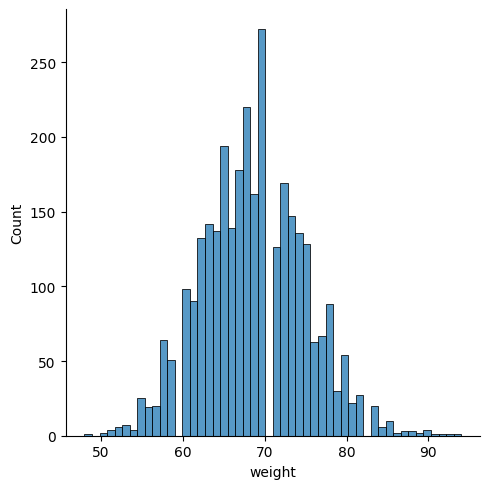

In [84]:
import seaborn

seaborn.displot(cyclists, 
                x="weight", 
                kind="hist",
                row_order="desc",
                bins=50)

In [85]:
!pip install scipy

In [86]:
from dataunderstanding import correlations

# races_numerical = races_numerical.astype('double')
correlations_races = correlations(races_numerical)
correlations_races

c:\Users\feder\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:5278: RuntimeWarning: overflow encountered in scalar multiply
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


,points,length,climb_total,startlist_quality,average_temperature,position,cyclist_age,delta,correlation_type
points,1.000000,0.283637,0.044915,0.387373,0.153829,0.011531,-0.005476,0.068592,kendall
length,0.283637,1.000000,0.285099,0.064082,-0.095313,-0.015373,-0.002381,0.029217,kendall
climb_total,0.044915,0.285099,1.000000,0.009066,-0.079710,-0.023858,0.005533,0.356194,kendall
startlist_quality,0.387373,0.064082,0.009066,1.000000,0.218390,0.097527,0.033589,0.032290,kendall
average_temperature,0.153829,-0.095313,-0.079710,0.218390,1.000000,0.015593,0.033887,0.023630,kendall
position,0.011531,-0.015373,-0.023858,0.097527,0.015593,1.000000,0.006378,0.296542,kendall
cyclist_age,-0.005476,-0.002381,0.005533,0.033589,0.033887,0.006378,1.000000,-0.002685,kendall
delta,0.068592,0.029217,0.356194,0.032290,0.023630,0.296542,-0.002685,1.000000,kendall
points,1.000000,0.406921,0.110904,0.170652,-0.119733,-0.079777,-0.014525,0.005707,pearson
length,0.406921,1.000000,0.520616,0.073952,-0.070199,-0.012024,0.003442,0.092850,pearson


In [87]:
# Let's see the correlation between numerical data

cyclist_numerical = cyclists.select_dtypes(include="number")
correlations_cyclists = correlations(cyclist_numerical)
correlations_cyclists


,birth_year,weight,height,correlation_type
birth_year,1.000000,-0.063740,0.094976,kendall
weight,-0.063740,1.000000,0.539760,kendall
height,0.094976,0.539760,1.000000,kendall
birth_year,1.000000,-0.104242,0.154252,pearson
weight,-0.104242,1.000000,0.720732,pearson
height,0.154252,0.720732,1.000000,pearson
birth_year,1.000000,-0.091220,0.137001,spearman
weight,-0.091220,1.000000,0.705189,spearman
height,0.137001,0.705189,1.000000,spearman


In [88]:
!pip install matplotlib

# High correlation between height and weight
As we can expect, weight and height are highly correlated, maybe we can merge the two features into one index?

# Obbiettivi:
- Capire i campi e a cosa possono servire
- Quanti campi sono null per ogni matrice
- pene
- Che tipo di cleaning poter fare
- 

# MERGE THE DATASETS

In [89]:
from utils import merge_dataset

merged_dataset = merge_dataset(dataset1= cyclists,
                               dataset2= races,
                               key_left= '_url',
                               key_right= 'cyclist')

In [90]:
merged_dataset.head()

,_url_x,name_x,birth_year,weight,height,nationality,_url_y,name_y,points,uci_points,...,average_temperature,date,position,cyclist,cyclist_age,is_tarmac,is_cobbled,is_gravel,cyclist_team,delta
0,bruno-surra,Bruno Surra,1964.0,NaN,NaN,Italy,vuelta-a-espana/1989/stage-1,Vuelta a España,80.0,NaN,...,NaN,1989-04-24 00:25:33,110,bruno-surra,25.0,True,False,False,NaN,15.0
1,gerard-rue,Gérard Rué,1965.0,74.0,182.0,France,tour-de-france/1997/stage-2,Tour de France,100.0,NaN,...,NaN,1997-07-07 06:27:47,132,gerard-rue,32.0,True,False,False,denmark-1991,0.0
2,gerard-rue,Gérard Rué,1965.0,74.0,182.0,France,tour-de-france/1990/stage-1,Tour de France,100.0,NaN,...,NaN,1990-07-01 03:29:36,66,gerard-rue,25.0,True,False,False,france-1978,635.0
3,gerard-rue,Gérard Rué,1965.0,74.0,182.0,France,tour-de-france/1992/stage-7,Tour de France,100.0,NaN,...,NaN,1992-07-11 04:22:52,35,gerard-rue,27.0,True,False,False,france-1978,65.0
4,gerard-rue,Gérard Rué,1965.0,74.0,182.0,France,tour-de-france/1990/stage-9,Tour de France,100.0,NaN,...,NaN,1990-07-09 04:46:44,41,gerard-rue,25.0,True,False,False,france-1978,37.0


# Remove stuff

From the merged dataset we end up with: \
<span style="color: red;">deleted features</span>

_url_x \
<span style="color: red;"> name_x </span> deleted because we use url_x for identification \
birth_year\
<span style="color: red;">weight </span> deleted because many values are missing \
<span style="color: red;">height </span> deleted because many values are missing \
nationality \
<span style="color: red;">_url_y </span> deleted because we use url_x for identification \
<span style="color: red;">name_y </span> deleted because we use url_x for identification \
points\
uci_points\
length
climb_total\
profile
startlist_quality\
<span style="color: red;">average_temperature </span> deleted because many values are missing \
date
position\
<span style="color: red;">cyclist </span> deleted because we use url_x for identification \
cyclist_age\
is_tarmac\
is_cobbled\
is_gravel \
cyclist_team\
delta



In [91]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589865 entries, 0 to 589864
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   _url_x               589865 non-null  object 
 1   name_x               589865 non-null  object 
 2   birth_year           589752 non-null  float64
 3   weight               478431 non-null  float64
 4   height               479746 non-null  float64
 5   nationality          589813 non-null  object 
 6   _url_y               589865 non-null  object 
 7   name_y               589865 non-null  object 
 8   points               589388 non-null  float64
 9   uci_points           251086 non-null  object 
 10  length               589865 non-null  float64
 11  climb_total          442820 non-null  float64
 12  profile              441671 non-null  object 
 13  startlist_quality    589865 non-null  int64  
 14  average_temperature  29933 non-null   float64
 15  date             

In [92]:
final_dataset = merged_dataset.drop(columns=['name_x','height','weight','_url_y','name_y','cyclist'])

In [93]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589865 entries, 0 to 589864
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   _url_x               589865 non-null  object 
 1   birth_year           589752 non-null  float64
 2   nationality          589813 non-null  object 
 3   points               589388 non-null  float64
 4   uci_points           251086 non-null  object 
 5   length               589865 non-null  float64
 6   climb_total          442820 non-null  float64
 7   profile              441671 non-null  object 
 8   startlist_quality    589865 non-null  int64  
 9   average_temperature  29933 non-null   float64
 10  date                 589865 non-null  object 
 11  position             589865 non-null  int64  
 12  cyclist_age          589752 non-null  float64
 13  is_tarmac            589865 non-null  bool   
 14  is_cobbled           589865 non-null  bool   
 15  is_gravel        

In [94]:
final_dataset.isnull().sum()

_url_x                      0
birth_year                113
nationality                52
points                    477
uci_points             338779
length                      0
climb_total            147045
profile                148194
startlist_quality           0
average_temperature    559932
date                        0
position                    0
cyclist_age               113
is_tarmac                   0
is_cobbled                  0
is_gravel                   0
cyclist_team           159161
delta                       0
dtype: int64

In [95]:
final_dataset.dropna()

,_url_x,birth_year,nationality,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,date,position,cyclist_age,is_tarmac,is_cobbled,is_gravel,cyclist_team,delta
223,jan-maas,1996.0,Netherlands,225.0,500.0,254100.0,3460.0,2.0,705,10.0,2022-04-10 06:07:45,39,26.0,False,False,False,munck-beck-s-1975,386.0
224,jan-maas,1996.0,Netherlands,50.0,40.0,170000.0,522.0,1.0,530,29.0,2023-02-24 04:01:04,119,27.0,True,False,False,bankgiroloterij-batavus-2000,237.0
225,jan-maas,1996.0,Netherlands,50.0,50.0,193800.0,3261.0,2.0,719,11.0,2023-04-04 05:06:30,112,27.0,True,False,False,bankgiroloterij-batavus-2000,777.0
226,jan-maas,1996.0,Netherlands,50.0,60.0,178000.0,2729.0,3.0,508,15.0,2022-04-27 04:28:31,85,26.0,True,False,False,munck-beck-s-1975,273.0
227,jan-maas,1996.0,Netherlands,50.0,60.0,177600.0,2746.0,2.0,767,29.0,2022-06-12 04:30:46,113,26.0,True,False,False,munck-beck-s-1975,835.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589857,ward-vanhoof,1999.0,Belgium,225.0,300.0,183700.0,1459.0,2.0,866,15.0,2023-03-29 04:07:36,37,24.0,False,False,False,sport-vlaanderen-baloise-2021,76.0
589858,ward-vanhoof,1999.0,Belgium,225.0,400.0,203900.0,2010.0,2.0,640,16.0,2022-03-25 04:50:32,106,23.0,False,False,False,canada-1996,748.0
589860,ward-vanhoof,1999.0,Belgium,275.0,500.0,257200.0,1362.0,1.0,747,17.0,2022-04-17 05:41:47,32,23.0,False,False,False,canada-1996,287.0
589861,ward-vanhoof,1999.0,Belgium,225.0,300.0,183700.0,1649.0,2.0,648,28.0,2022-03-30 04:09:51,48,23.0,False,False,False,canada-1996,252.0


In [96]:
from dataunderstanding import correlations
import seaborn as sns
import matplotlib.pyplot as plt

final_dataset_numerical = races_numerical.astype('double')
correlations_final = correlations(final_dataset_numerical)
correlations_final

c:\Users\feder\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:5278: RuntimeWarning: overflow encountered in scalar multiply
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


,points,length,climb_total,startlist_quality,average_temperature,position,cyclist_age,delta,correlation_type
points,1.000000,0.283637,0.044915,0.387373,0.153829,0.011531,-0.005476,0.068592,kendall
length,0.283637,1.000000,0.285099,0.064082,-0.095313,-0.015373,-0.002381,0.029217,kendall
climb_total,0.044915,0.285099,1.000000,0.009066,-0.079710,-0.023858,0.005533,0.356194,kendall
startlist_quality,0.387373,0.064082,0.009066,1.000000,0.218390,0.097527,0.033589,0.032290,kendall
average_temperature,0.153829,-0.095313,-0.079710,0.218390,1.000000,0.015593,0.033887,0.023630,kendall
position,0.011531,-0.015373,-0.023858,0.097527,0.015593,1.000000,0.006378,0.296542,kendall
cyclist_age,-0.005476,-0.002381,0.005533,0.033589,0.033887,0.006378,1.000000,-0.002685,kendall
delta,0.068592,0.029217,0.356194,0.032290,0.023630,0.296542,-0.002685,1.000000,kendall
points,1.000000,0.406921,0.110904,0.170652,-0.119733,-0.079777,-0.014525,0.005707,pearson
length,0.406921,1.000000,0.520616,0.073952,-0.070199,-0.012024,0.003442,0.092850,pearson


0
1
2


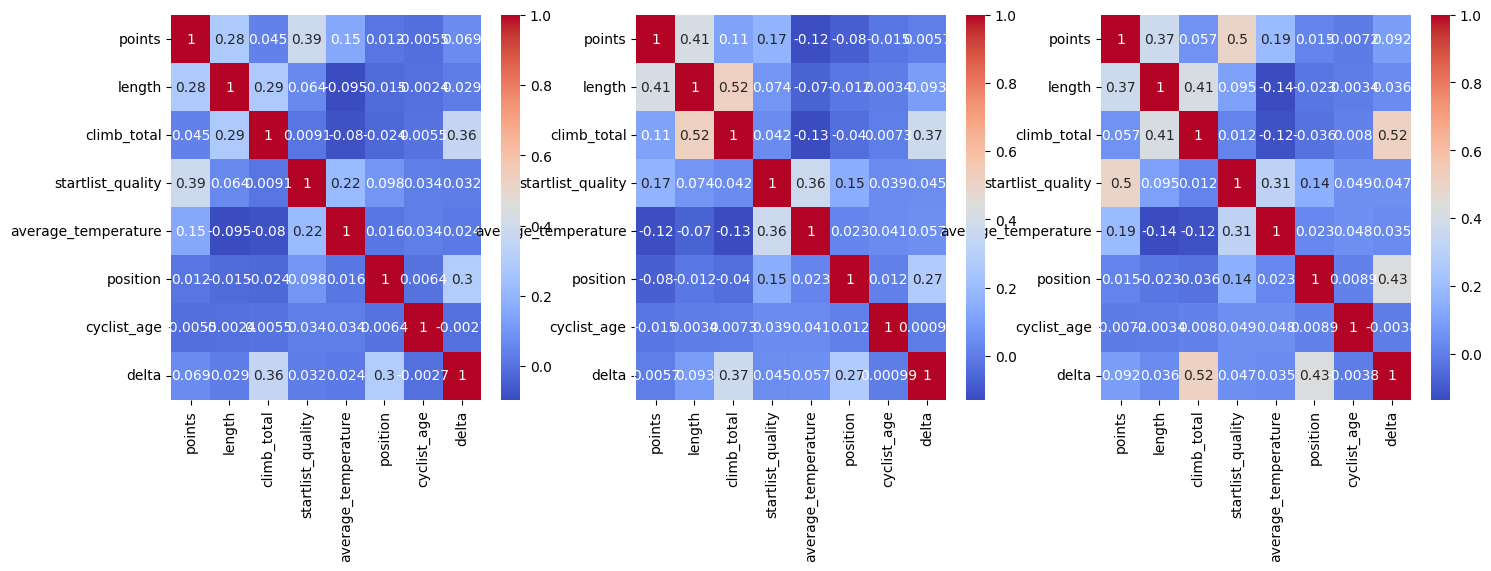

In [102]:
correlations = []
for tipo in correlations_final['correlation_type'].unique():
    df_tipo = correlations_final[correlations_final['correlation_type'] == tipo]

    correlations.append(df_tipo)



fig, axs = plt.subplots(1, 3, figsize=(17, 5))  # 1 riga, 3 colonne

for i,ax in enumerate(axs.flat):
    print(i)
    tmp = correlations[i].drop(columns='correlation_type')
    sns.heatmap(tmp, annot=True, cmap='coolwarm', ax=ax)

#plt.tight_layout()
plt.show()
# sns.heatmap(correlations[0], annot=True, cmap='coolwarm', center=0)
# plt.show()